In [33]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
with open(r'/content/images.p','rb') as f:
  images=pickle.load(f)
with open(r'/content/labels.p','rb')  as f:
  labels=pickle.load(f)

In [35]:
print(images.shape)
print(labels.shape)

(1199, 100, 100)
(1199,)


In [36]:
set(labels)

{'Smruti',
 'chhotu',
 'kaira',
 'laira',
 'liti di',
 'mammy',
 'manti di',
 'manu bhai',
 'mousumi di',
 'sanvi',
 'siman',
 'sumit bhai'}

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [38]:
n_persons=len(set(labels))
print("Number Of Persons:",n_persons )
label_mapping=le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i,'-->',label_mapping[i])

Number Of Persons: 12
0 --> Smruti
1 --> chhotu
2 --> kaira
3 --> laira
4 --> liti di
5 --> mammy
6 --> manti di
7 --> manu bhai
8 --> mousumi di
9 --> sanvi
10 --> siman
11 --> sumit bhai


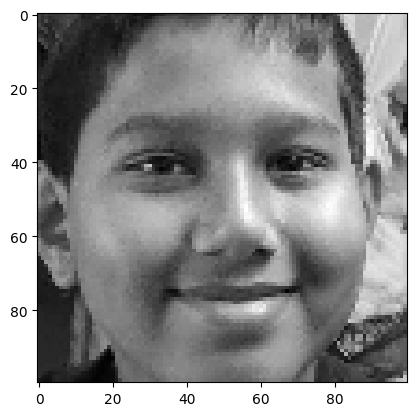

In [39]:
plt.imshow(images[2],cmap='gray')
plt.show()

In [40]:
import cv2

In [41]:
def preprocessing(img):
  img=cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img=img/255
  return img

In [42]:
images=np.array(list(map(preprocessing,images)))
print('shape of input:',images.shape)

shape of input: (1199, 100, 100, 1)


In [43]:
from keras.utils import to_categorical
labels=to_categorical(labels)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [48]:
def create_model():
    model=Sequential()
    #convolutional layer &ReLU layer
    model.add(Conv2D(8,(5,4),input_shape=(100,100,1),activation='relu'))
    #Max Pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(4,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #Flattern
    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
     #output
    model.add(Dense(12,activation='softmax'))
    model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [49]:
model=create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 97, 8)         168       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 4)         292       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 4)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2116)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [50]:
h=model.fit(images,labels,validation_split=0.1,epochs=15,verbose=1)

Epoch 1/15
34/34 [==============================] - 8s 197ms/step - loss: 0.8531 - accuracy: 0.7451 - val_loss: 9.7699 - val_accuracy: 0.1667
Epoch 2/15
34/34 [==============================] - 5s 140ms/step - loss: 0.1736 - accuracy: 0.9574 - val_loss: 15.0706 - val_accuracy: 0.1667
Epoch 3/15
34/34 [==============================] - 5s 154ms/step - loss: 0.0915 - accuracy: 0.9731 - val_loss: 14.8649 - val_accuracy: 0.1667
Epoch 4/15
34/34 [==============================] - 6s 164ms/step - loss: 0.0390 - accuracy: 0.9870 - val_loss: 23.2013 - val_accuracy: 0.1667
Epoch 5/15
34/34 [==============================] - 5s 135ms/step - loss: 0.0264 - accuracy: 0.9889 - val_loss: 21.7144 - val_accuracy: 0.1667
Epoch 6/15
34/34 [==============================] - 6s 183ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 27.1552 - val_accuracy: 0.1667
Epoch 7/15
34/34 [==============================] - 5s 135ms/step - loss: 6.2081e-04 - accuracy: 1.0000 - val_loss: 33.2187 - val_accuracy: 0.1

In [51]:
model.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
